    BMI  Age  Sugar
0  33.6   50      1
1  26.6   30      0
2  23.4   40      0
3  43.1   67      0
4  35.3   23      1
5  35.9   67      1
6  36.7   45      1
7  25.7   46      0
8  23.3   29      0
9  31.0   56      1


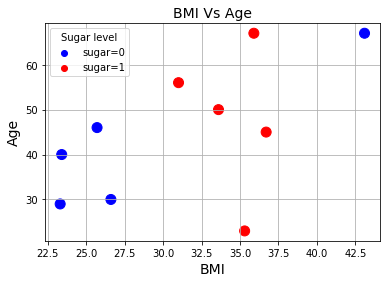

The predicted class for BMI=43.6 and Age=40 is: 1
The person has sugar
Confusion Matrix:
[[2 0]
 [0 1]]


C:\Users\DBLab\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
d1={'BMI':[33.6,26.6,23.4,43.1,35.3,35.9,36.7,25.7,23.3,31],
    'Age':[50,30,40,67,23,67,45,46,29,56],
    'Sugar':[1,0,0,0,1,1,1,0,0,1]}
data1=pd.DataFrame(d1)
data1.to_csv("NewDataset")
print(data1)

col=data1['Sugar'].map({0:'blue',1:'red'})
plt.scatter(data1['BMI'],data1['Age'],color=col,s=100)
plt.title('BMI Vs Age',fontsize=14)
plt.xlabel('BMI',fontsize=14)
plt.ylabel('Age',fontsize=14)
plt.scatter([],[],color='blue',label='sugar=0')
plt.scatter([],[],color='red',label='sugar=1')
plt.legend(title='Sugar level')
plt.grid(True)
plt.show()

x = data1[['BMI', 'Age']]
y = data1['Sugar']
scalar=preprocessing.StandardScaler().fit(x)
X_scaled = scalar.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3,stratify=y,random_state=0)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

new_data = np.array([[43.6, 40]])
new_data_scaled = scalar.transform(new_data)
pred = knn.predict(new_data_scaled)
print(f"The predicted class for BMI=43.6 and Age=40 is: {pred[0]}")
if pred[0]==0:
    print("The person has no sugar")
else:
    print("The person has sugar")
    
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)